This notebook serves as a short introduction to applying the fast fourier transform to time series data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
## From scipy we can import the fftpack to perform the fast fourier transform
import scipy.fftpack
%matplotlib inline

In [3]:
# Number of samplepoints
N = 10000
# time interval in seconds
T = 10000.0
dt=T/N
# defining a time from zero to the number of sample points. 0 to 1 with a step of 1/N.
#this could be written as np.linspace(0,1/N,1)
t=np.linspace(0.0,N,N)/N
#defining the time (in this case x) in seconds
x=t*T

Lets make a few test functions first. y20 and y10 represent sinewaves with periods of 20 and 10 for the domain (periods of 500 and 1000). The third function changes the amplitude of y10.

In [4]:
#defining test functions
y20=np.sin(20*2*np.pi*x)
y10=np.sin(10*2*np.pi*x)
y10_4=4*np.sin(10*2*np.pi*x)

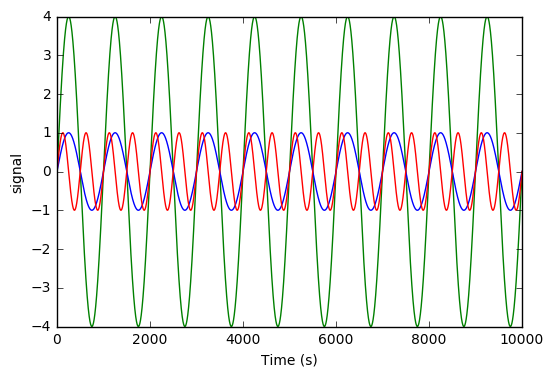

In [5]:
#plotting commands for the 3 timeseries
plt.plot(x,y10_4,'g-')
plt.plot(x,y10,'b-')
plt.plot(x,y20,'r-')
plt.axis([0,10000,-4,4])
plt.xlabel('Time (s)')
plt.ylabel('signal')

The plot of the arbitrary signal against time shows us the three timeseries that we created. The red has a period of 500 seconds, while the blue and green have periods of 1000 seconds. The amplitude of the green is four times that of the blue. Let's now take a look at the fourier transform of y10_4.

In [6]:
#xf will be the x-axis for plotting and represents frequency.
xf = x[0:len(x)/2]/(T*dt)
## The fast fourier transform returns symmetrical data, so we will only work with the first half of the series. 

The following code will return the fourier coefficients of the fourier series that represents our three different functions. The coefficients can be thought of as the contribution of a given frequency to the total variance of the time signal. In that above, the time signal has a variance associated with the dominant frequency (if the functions were more complicated the total variance would be spread across multiple frequencies).

In [7]:
yf20 = scipy.fftpack.fft(y20)
yf10 = scipy.fftpack.fft(y10)
yf10_4 = scipy.fftpack.fft(y10_4)

We are going to plot the normalized power spectra (PSD). The power spectra can be estimated by looking at the square of the coefficients. We normalize the total series by 2/N^2.

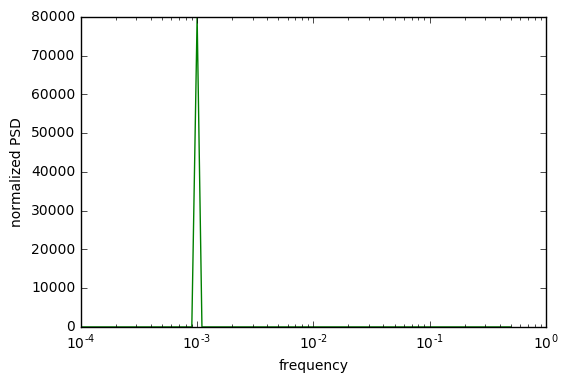

In [8]:
plt.semilogx(xf,((2.0/N)*np.abs(yf10_4[0:N/2])**2),'g-')
plt.ylabel('normalized PSD')
plt.xlabel('frequency')

Given that we only had one period in our function we find that the power is in a single spike. The spike has a peak at a frequency of $10^{-3}.$ This gives us a period of $1/10^{-3}$ a thousand, which is what the time signal from the plot above shows. Now let's look at the plot in loglog space to get a better idea of the function.

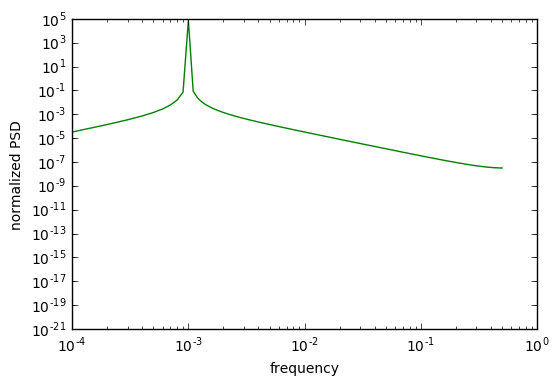

In [9]:
plt.loglog(xf,((2.0/N)*np.abs(yf10_4[0:N/2])**2),'g-')##it can be easier to see the plot in log space
plt.ylabel('normalized PSD')
plt.xlabel('frequency')

If we normalize the coefficients by $2/N^2$ at the value within the single peak we can find the variance within that given frequency. We can check that this is correct by taking the variance of the time signal as well. We can also recover the amplitude of the signal by finding the value of the peak for the absolute values of the fourier coefficients normalized by 2/N. See the statements below.

In [10]:
print 'variance at maximum value'
print np.max((2.0/N**2)*np.abs(yf10_4[0:N/2])**2)
print 'variance from original signal' 
print np.std(y10_4)**2
print 'amplitude at maximum value'
print np.max((2.0/N)*np.abs(yf10_4[0:N/2]))
print 'actual amplitude'
print 4

variance at maximum value
7.9991736532
variance from original signal
7.99920000001
amplitude at maximum value
3.99979340797
actual amplitude
4


Now that we know a little bit about what the power spectra (in the form of what is called a periodogram) means we can take a look at all three functions from earlier. Notice that Y20 (in red) has a different frequency of $2 \times 10^{-3}$, which gives us a period of 500 seconds. The green plot has 4 times the power at its dominant frequency compared to the blue line (this is because they are the same sinewave, but the green has an amplitude of 4).

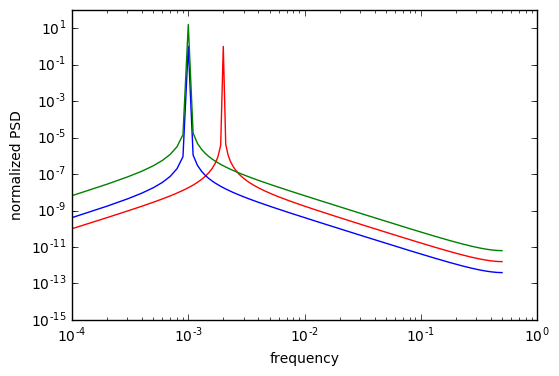

In [11]:
plt.loglog(xf,((2.0/N)*np.abs(yf20[0:N/2]))**2,'r-')
plt.loglog(xf,((2.0/N)*np.abs(yf10[0:N/2]))**2,'b-')
plt.loglog(xf,((2.0/N)*np.abs(yf10_4[0:N/2]))**2,'g-')
plt.axis([10**-4,10**0,10**-15,10**2])

plt.ylabel('normalized PSD')
plt.xlabel('frequency')

As a side note here, python has a way to compute the periodogram with a single function (blue line), which I compare with the above as a check (red dashed line). The function signal.periodogram takes the data and the sampling rate as inputs and returns the frequency and squared fourier coefficients.

In [12]:
from scipy import signal
f, pxx = signal.periodogram(y20,dt)

[0.0001, 1, 1e-15, 1]

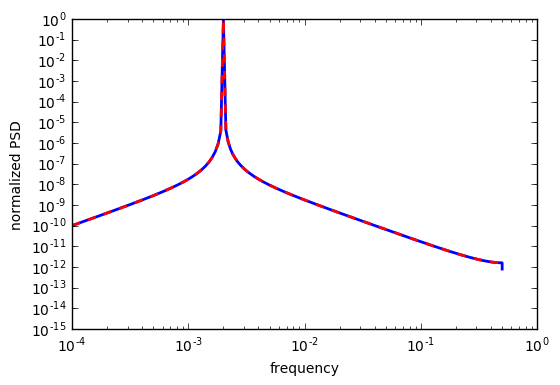

In [13]:
plt.loglog(f,pxx*(2.0/N),'b-',linewidth=2)
plt.loglog(xf,((2.0/N)*np.abs(yf20[0:N/2]))**2,'r--',linewidth=2)
plt.ylabel('normalized PSD')
plt.xlabel('frequency')
plt.axis([10**-4,10**0,10**-15,10**0])

We can make a slightly more complicated timeseries by combining two of the signals from earlier. The resulting power spectra shows us both dominant frequencies.

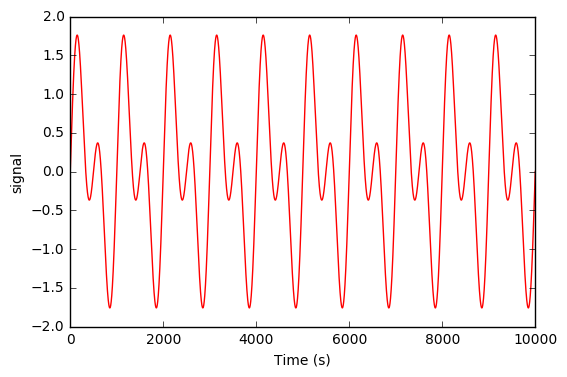

In [14]:
#Here we can combine two sinewaves into a single function
y_c=np.sin(20*2*np.pi*x)+np.sin(10*2*np.pi*x)
plt.plot(x,y_c,'r-')
plt.axis([0,10000,-2,2])
plt.xlabel('Time (s)')
plt.ylabel('signal')

[0.0001, 1, 1e-15, 1]

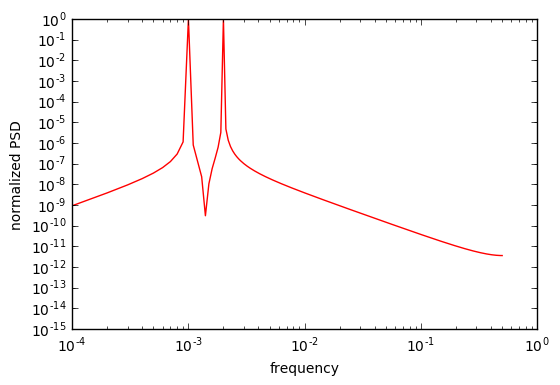

In [15]:
yf_c = scipy.fftpack.fft(y_c)
plt.loglog(xf,((2.0/N)*np.abs(yf_c[0:N/2]))**2,'r-')
plt.ylabel('normalized PSD')
plt.xlabel('frequency')
plt.axis([10**-4,10**0,10**-15,10**0])

With only two functions in the sinewave time domain it can be pretty easy to discern the resulting frequencies, but what if we add noise to the data? Below, I've added random noise taken from a normal distribution with a mean of zero and standard deviation of one. The blue line shows the regular Y20 signal, whereas the red line shows the same signal with random noise added. The signal is still clearly periodic, but it is no longer as obvious.

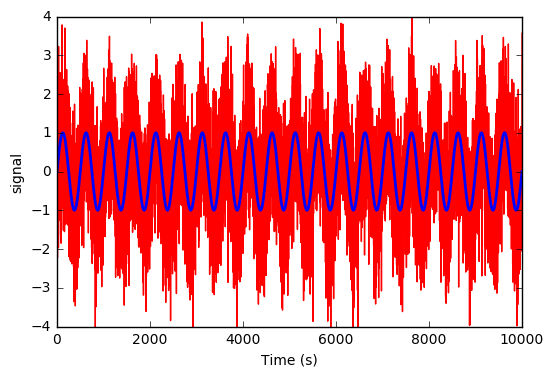

In [21]:
y20_noise=np.sin(20*2*np.pi*x)+np.random.randn(N)
plt.plot(x,y20_noise,'r-')
plt.plot(x,y20,'b-',linewidth=2)
plt.axis([0,10000,-4,4])
plt.xlabel('Time (s)')
plt.ylabel('signal')

In [22]:
yf20_noise = scipy.fftpack.fft(y20_noise)

[0.0001, 1, 1e-15, 1]

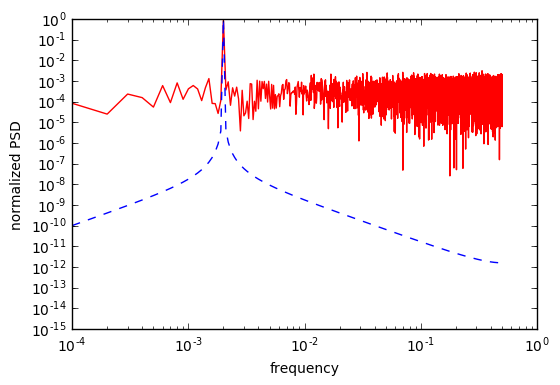

In [23]:
plt.loglog(xf,((2.0/N)*np.abs(yf20_noise[0:N/2]))**2,'r-')
plt.loglog(xf,((2.0/N)*np.abs(yf20[0:N/2]))**2,'b--')
plt.ylabel('normalized PSD')
plt.xlabel('frequency')
plt.axis([10**-4,10**0,10**-15,10**0])

I've plotted the original Y20 power spectra as the blue dashed line to show that both power spectras have the same peak. There is a clear peak in the red data that shows us the sinewave hidden within the time signal. The slope of the red data also tells us something about the structure of the noise, it's random. This is called white noise, and is the same idea as static on the radio (if we were to record the static and plot up its power spectra it would have a flat slope).

Moving on to another common occurence, trends in timeseries. Anytime you have a first order trend present in your time series data it will alter the power spectra. The fast fourier transform assumes that the timeseries is stationary in time (no trend). Notice that as long as the trend isn't too large we can still see the periodicity present in the data. Try adjusting the slope of the trend upwards and see what happens to the resulting power spectra.

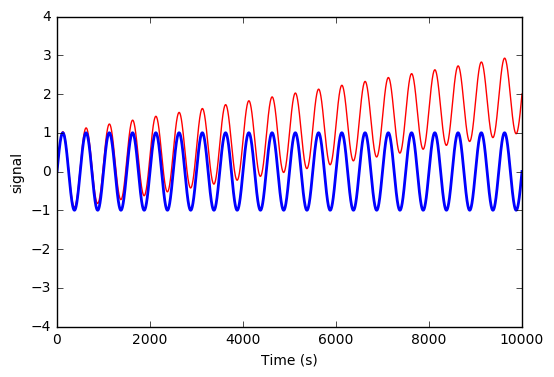

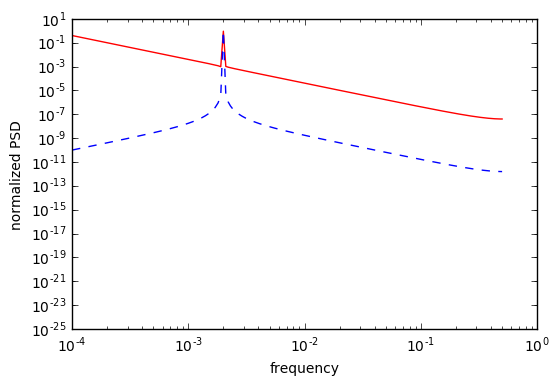

In [35]:
slope=0.0002
y20_trend=np.sin(20*2*np.pi*x)+slope*x
plt.figure(1)
plt.plot(x,y20_trend,'r-')
plt.plot(x,y20,'b-',linewidth=2)
plt.axis([0,10000,-4,4])
plt.xlabel('Time (s)')
plt.ylabel('signal')
yf20_trend = scipy.fftpack.fft(y20_trend)
plt.figure(2)
plt.loglog(xf,((2.0/N)*np.abs(yf20_trend[0:N/2]))**2,'r-')
plt.loglog(xf,((2.0/N)*np.abs(yf20[0:N/2]))**2,'b--')
plt.ylabel('normalized PSD')
plt.xlabel('frequency')
#plt.axis([10**-4,10**0,10**-15,10**0])

Most of the time removing the first order trend can be done with linear regression. Most numerical data languages have a simple way to do this with their detrend function. After using the detrend function we recover our original data (the red dashed line represents the detrended data, and it plots on top of the original data in blue).

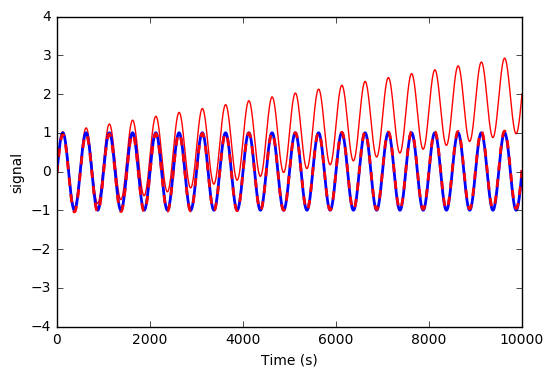

In [25]:
slope=0.0002
y20_trend=np.sin(20*2*np.pi*x)+slope*x
y20_detrend=signal.detrend(np.sin(20*2*np.pi*x)+.0002*x)
plt.figure(1)
plt.plot(x,y20_trend,'r-')
plt.plot(x,y20,'b-',linewidth=2)
plt.plot(x,y20_detrend,'r--',linewidth=2)
plt.axis([0,10000,-4,4])
plt.xlabel('Time (s)')
plt.ylabel('signal')

So far, the power spectra hasn't really shown us we didn't already see in the data. Now we will make the series more complicated by giving it four different periods and random noise. This is where the fourier analysis really starts to show some merit as we can see that the power spectra is displaying four clear peaks that match our input periods.

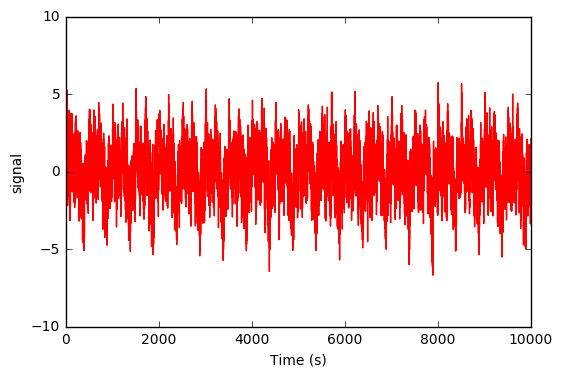

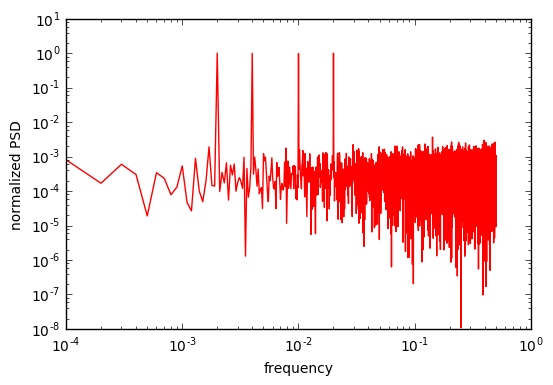

In [26]:
y20_complicated=np.sin(20*2*np.pi*x)+np.random.randn(N)+np.sin(200*2*np.pi*x)+np.cos(40*2*np.pi*x)+np.sin(100*2*np.pi*x)
plt.figure(1)
plt.plot(x,y20_complicated,'r-')
plt.axis([0,10000,-10,10])
plt.xlabel('Time (s)')
plt.ylabel('signal')
yf20_complicated = scipy.fftpack.fft(y20_complicated)
plt.figure(2)
plt.loglog(xf,((2.0/N)*np.abs(yf20_complicated[0:N/2]))**2,'r-')
plt.ylabel('normalized PSD')
plt.xlabel('frequency')
#plt.axis([10**-4,10**0,10**-15,10**0])

The above analysis was all for data that isn't strongly correlated and for the most part doesn't show any structure outside of the sinewaves. Below we will take a quick look at what happens if we have a random walk, which over small distances is correlated to itself.

In [27]:
##number of timesteps
n=10**5
n_z=np.zeros([n,1])

The following for loop computes a simple random walk. The walker's initial position starts at 0 and every timestep the walker takes a random step left or right (positive or negative). The correlation arises because the walker's future position is determined by where the walker was at the prior timestep (unless the walker is able to take really large steps [this would be called a Levy flight], we'll leave that for another time). A lot of environmental data looks like the random walk below, and will show broadscale correlations within its' structure. For example a river's current water level and the direction it is headed depends on if the stage is rising or falling. After a storm, we expect the waterlevel to rise and the structure of the hydrograph will be correlated to its past for the duration of the flood.

In [42]:
for nn in range(0,n):
    n_z[nn]=n_z[nn-1]+np.random.randn()

In [43]:
n_z_time=np.linspace(0,n,n)
#We'll take the following sinewave and add it to the random walk.
sinewave=50*np.sin(100*2*np.pi*n_z_time)

In [44]:
#Python doesn't like to deal with adding long series together and will give a memory error.
#This is where Pandas becomes really useful as it can handle long series with ease.
import pandas as pd
data=pd.DataFrame(index=np.arange(0,n))
data['time_x']=n_z_time
data['n_z']=n_z
data['sinewave']=sinewave
data['signal']=data.sinewave+data.n_z

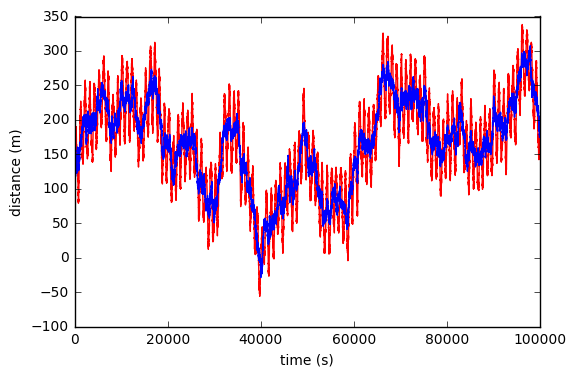

In [45]:
plt.plot(data.time_x,data.signal,'r-')
plt.plot(data.time_x,data.n_z,'b-')
plt.xlabel('time (s)')
plt.ylabel('distance (m)')

In [46]:
n_z_f = scipy.fftpack.fft(data.signal)
n_z_f_ns = scipy.fftpack.fft(data.n_z)

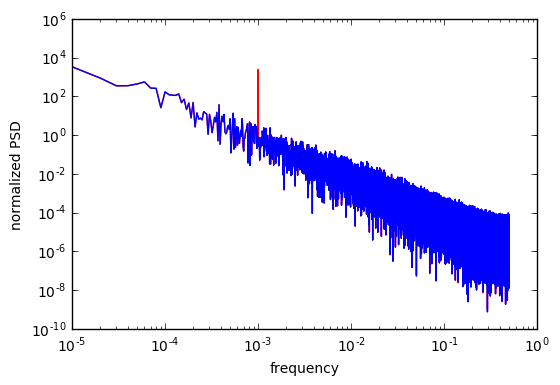

In [47]:
plt.loglog(data.time_x[0:len(data)/2]/n,((2.0/n)*np.abs(n_z_f[0:n/2]))**2,'r-')
plt.loglog(data.time_x[0:len(data)/2]/n,((2.0/n)*np.abs(n_z_f_ns[0:n/2]))**2,'b-')
plt.xlabel('frequency')
plt.ylabel('normalized PSD')

Here I've plotted the random walk power spectra in blue on top of the random walk + sinewave in red. The two are mostly the same except for the lone spike at the frequency of the sinewave that we added. Notice that unlike white noise this power spectra has a slope that can tell us something about the large scale structure in the data. When looking this type of analysis up in the literature it is commonly referred to as 1/f noise (one over f noise). For a slope of -2 the noise is called pink or red.
